In [1]:
!pip install opendatasets --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
url = 'https://www.kaggle.com/competitions/79-dapt-ih-hotel-booking/data'

od.download(url)

Skipping, found downloaded files in "./79-dapt-ih-hotel-booking" (use force=True to force download)


In [4]:
df_train = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_traintest.csv')
df_test = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_feat_valid_2.csv')
df_sample = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_sample_valid.csv')

In [5]:
df_train.shape, df_test.shape, df_sample.shape

((113409, 29), (5981, 28), (5981, 2))

In [6]:
hotel_origin = pd.concat([df_train, df_test])

In [7]:
hotel_origin.shape

(119390, 29)

The dataset contains over 119390 rows and 29 columns

basic information about the data frame.

In [8]:
hotel_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 5980
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_cancelled                    113409 non-null  float64
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_guest 

In [9]:
hotel_origin.describe().T

,count,mean,std,min,25%,50%,75%,max
is_cancelled,113409.0,0.370658,0.482983,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.00,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.00,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.00,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.00,72.0


I remark that the minimum of the average daily rate (`adr`) is negative, this is an absurd thing, since the `adr` is calculated by dividing of all *lodging transactions* by the total number of staying nights. Also knowing that by definition an *lodging transactions* means a charge to an occupant by a lodging operator for the occupancy of any short-term rental or vacation rental using a short-term rental marketplace.  
In short, it seems strange that a hotel accommodates customers and in addition gives them money. For that let's see how many customers have a negative `adr`.

In [10]:
hotel_origin[hotel_origin['adr'] < 0]['adr']

14214   -6.38
Name: adr, dtype: float64

In [11]:
hotel_origin.loc[[14214]]

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
14214,Resort Hotel,0.0,195,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,2017-03-15,2017-03-05,14969


We can see very well that it may have been a typing error, since there is only one customer who has a negative `adr`. According to the data, these are two adults who spent 11 days in a resort hotel. So I prefer to delete this line instead of making the `adr` positive, since there is no data on lodgging transactions.

In [12]:
hotel_origin.drop(index=14214, inplace=True)

This gave me the idea to see if there are customers who have spent a free stay in the hotel.

In [13]:
free_stay = hotel_origin[hotel_origin['adr'] == 0]
free_stay.head()

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0.0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0.0,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
124,Resort Hotel,0.0,32,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,2015-07-05,2015-07-04,125
164,Resort Hotel,0.0,111,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,2015-07-06,2015-07-06,167
165,Resort Hotel,0.0,0,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,2015-07-06,2015-07-06,168


In [14]:
free_stay['adr'].count()

1959

In [15]:
round(free_stay['adr'].count() / len(hotel_origin) * 100., 2)

1.64

There are **1959** people who have benefited from a free stay, or **1.64%** of all reservations.

Let's see how this 1.64% is distributed over the two types of hotels.

In [16]:
free_stay.groupby(['hotel']).count()['adr']

hotel
City Hotel      1208
Resort Hotel     751
Name: adr, dtype: int64

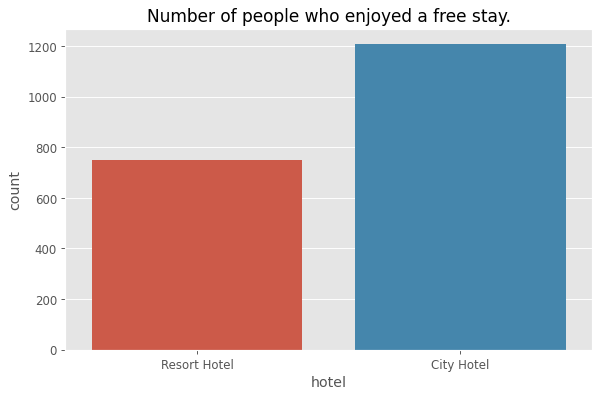

In [17]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Number of people who enjoyed a free stay.')
sns.countplot(x='hotel', data=free_stay)
plt.show()

There is a difference of **37%** between the two hotels in favor of city hotels. Let's see if this percentage is also respected on all the data.

In [18]:
hotel_origin[hotel_origin['adr'] > 0].groupby(['hotel']).count()['adr']

hotel
City Hotel      78122
Resort Hotel    39308
Name: adr, dtype: int64

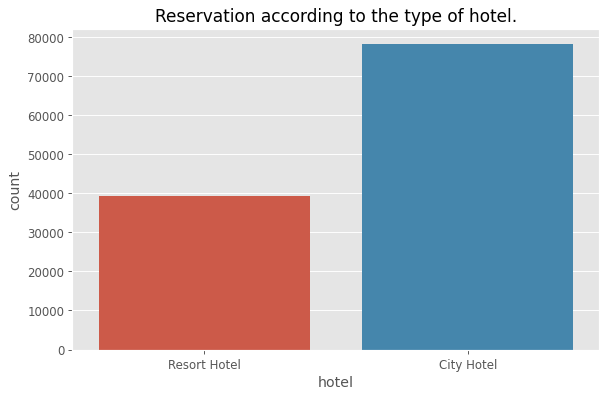

In [19]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Reservation according to the type of hotel.')
sns.countplot(x='hotel', 
              data=hotel_origin[hotel_origin['adr'] > 0]
            )
plt.show()

As expected more than 50% of reservations were for city hotels

Create a tally chart for each day of the week that people arrived.

Country

In [20]:
free_stay['country'].value_counts().head(10)

PRT    1550
ESP      79
GBR      73
FRA      55
DEU      41
ITA      17
BRA      13
USA      11
POL      10
BEL       8
Name: country, dtype: int64

In [21]:
hotel_origin['country'].value_counts().head(10)

PRT    48590
GBR    12128
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

What is the average number of nights for a stay?

In [22]:
total_stay_days = hotel_origin['stays_in_week_nights'] + hotel_origin['stays_in_weekend_nights']

round(total_stay_days.mean(),2)

3.43

What is the average total cost of a stay?

In [23]:
total_paid = hotel_origin['adr'] * total_stay_days
round(total_paid.mean(),2)

357.85

people who made special requests?

In [24]:
hotel_origin['total_of_special_requests'].value_counts()

0    70317
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

Arrival date

In [25]:
hotel_origin['reservation_status_date'] = pd.to_datetime(hotel_origin['reservation_status_date'])
hotel_origin['arrival_date'] = pd.to_datetime(hotel_origin['arrival_date'])

In [26]:
hotel_origin['arrival_date'].dt.month.min(), hotel_origin['arrival_date'].dt.month.max()

(1, 12)

In [27]:
hotel_origin['arrival_date'].dt.day.min(), hotel_origin['arrival_date'].dt.day.max()

(1, 31)

In [28]:
month_and_day = hotel_origin['arrival_date'].dt.day + hotel_origin['arrival_date'].dt.month * 100

In [29]:
month_and_day.min(), month_and_day.max()

(101, 1231)

In [30]:
# winter: 21 Dec to 20 Mars
# spring: 21 Mars to 20 Jun
# summer: 21 Jun to 20 Sep
# fall: 21 Sep to 20 Dec

season_period = ['winter', 'spring', 'summer', 'fall', 'winter2']
FROM_JAN_01 = 100
MARS_20 = 320
JUN_20 = 620
SEP_20 = 920
DEC_20 = 1220
DEC_31 = 1231

temp = pd.cut(
    month_and_day,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

hotel_origin['season'] = temp.str.replace('2', '')

In [31]:
hotel_origin.groupby(['season']).mean()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
season,,,,,,,,,,,,,,,,,,
fall,0.362193,103.348865,0.856958,2.283928,1.778422,0.057217,0.006270,0.035349,0.118196,0.124662,0.202532,80.057036,184.843418,3.948466,84.685349,0.060509,0.517459,56320.968766
spring,0.402984,108.393528,0.896470,2.466461,1.854869,0.087114,0.005678,0.028655,0.028302,0.148338,0.203177,90.558562,200.052196,3.294910,105.782876,0.054928,0.530656,62919.880171
summer,0.378158,130.400650,1.044908,2.760943,1.962107,0.162233,0.011295,0.019664,0.133478,0.091739,0.218039,84.506927,162.588492,0.674485,126.030507,0.066874,0.662784,59506.900433
winter,0.320083,55.826452,0.863427,2.371614,1.775368,0.086796,0.007795,0.052565,0.065108,0.207125,0.214615,92.145203,199.132168,1.719058,76.130202,0.068984,0.544552,58972.551825


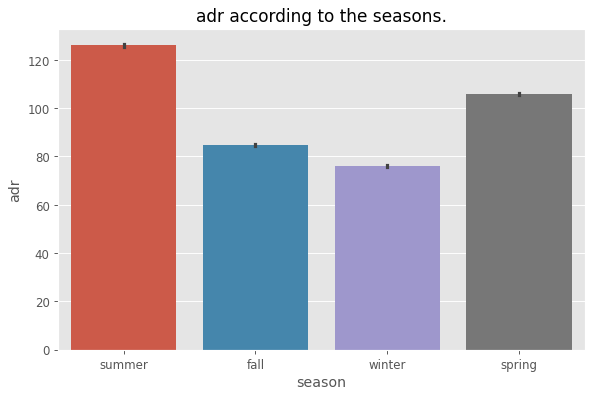

In [32]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin)
plt.show()

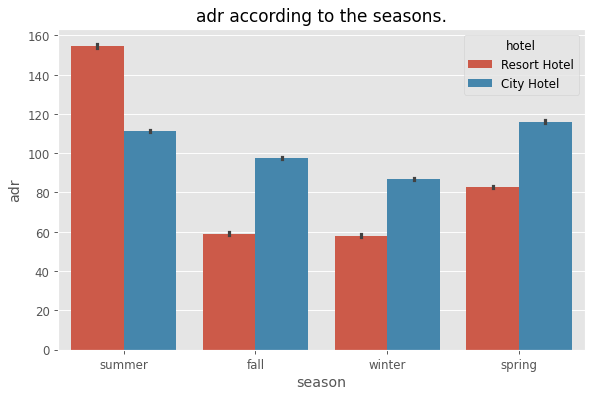

In [33]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin, hue='hotel')
plt.show()

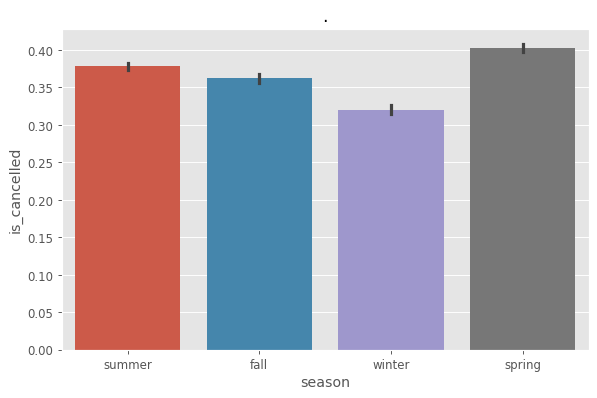

In [34]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.barplot(x='season', y='is_cancelled', data=hotel_origin)
plt.show()

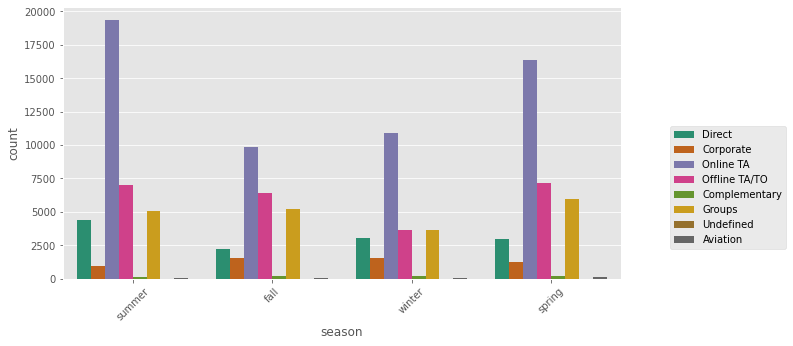

In [35]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(x='season', data=hotel_origin,
              hue='market_segment',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

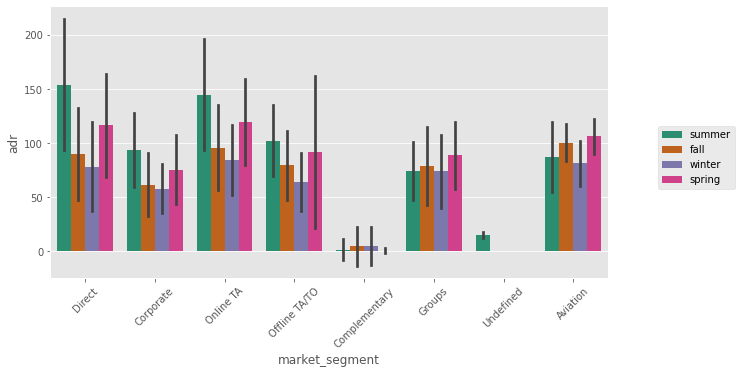

In [36]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(x='market_segment', y='adr', data=hotel_origin,
              hue='season',
              estimator=np.mean,
              ci='sd',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

week night weekend night

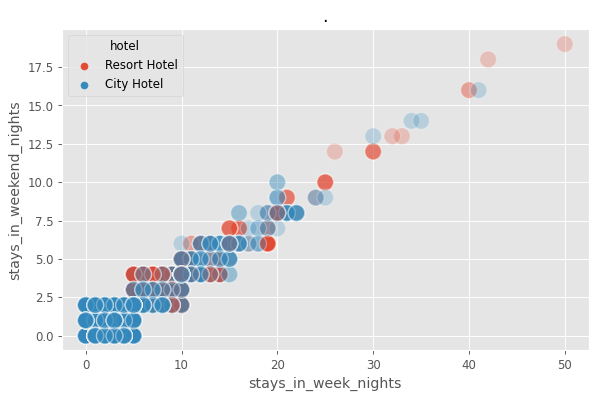

In [37]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='stays_in_weekend_nights', x='stays_in_week_nights',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

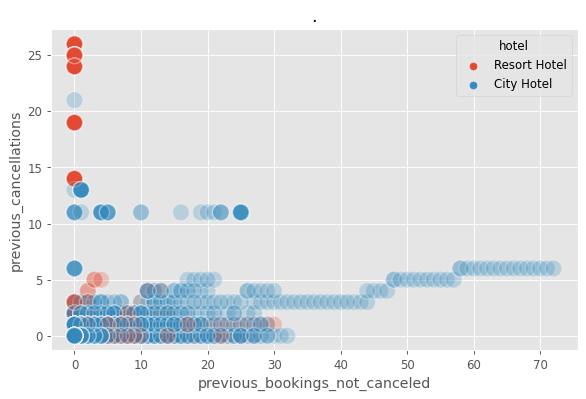

In [38]:
# previous_cancellations, previous_bookings_not_canceled
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='previous_cancellations', x='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

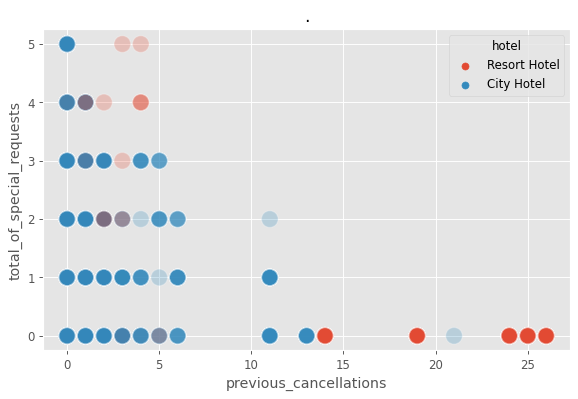

In [39]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='total_of_special_requests', x='previous_cancellations',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

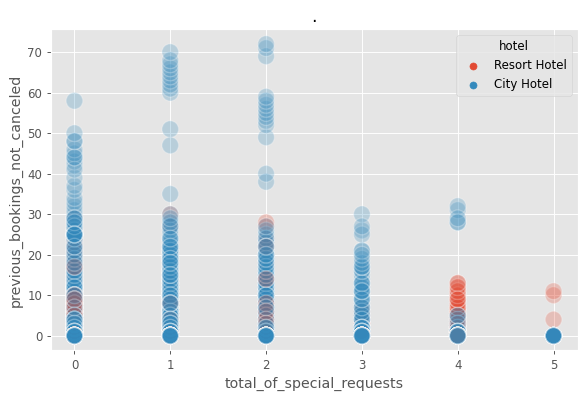

In [40]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(x='total_of_special_requests', y='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

In [41]:
hotel_origin['arrival_date'].dt.day_name().value_counts()

Friday       19631
Thursday     19254
Monday       18171
Saturday     18055
Wednesday    16139
Sunday       14140
Tuesday      13999
Name: arrival_date, dtype: int64

# Feature Engineering

## Feature Characteristics

#### **Missing Data**

In [42]:
def missing_data(df):
  for col in df.columns:
    s = round(df[col].isna().mean() * 100, 3)
    if s > 0:
      print(f"{col}: {s}%")

In [43]:
missing_data(df_train)

children: 0.003%
country: 0.404%
agent: 13.659%
company: 94.324%


In [44]:
missing_data(df_test)

children: 0.017%
country: 0.502%
agent: 14.195%
company: 93.981%


There are over 93% missing values in the `company` variable and over 13% in the `agent` variable. `agent` is a categorical variable, this is ID of the travel agency that made the booking. ID is presented instead of designation for anonymity reasons. “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

In [45]:
hotel_origin.columns

Index(['hotel', 'is_cancelled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'arrival_date', 'id_booking', 'season'],
      dtype='object')

In [46]:
hotel_origin.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19810
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Agent Missing data Not At Random (MNAR)
Can we infer this by looking at the data?

If data is MNAR, we could expect a greater number of missing values for cutomer who did not make online/offline tour agent/tour operator.

In [47]:
hotel_origin['agent'].isnull().groupby(hotel_origin['market_segment']).mean()

market_segment
Aviation         0.894515
Complementary    0.861373
Corporate        0.867611
Direct           0.476519
Groups           0.209389
Offline TA/TO    0.016062
Online TA        0.006162
Undefined        1.000000
Name: agent, dtype: float64

In [48]:
ta = ['Online TA', 'Offline TA/TO']
singular = ['Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation', 'Undefined']

ta_to_agent = hotel_origin[hotel_origin.market_segment.isin(ta)][['agent']]
ta_to_agent.isna().sum() * 100. / len(ta_to_agent)

agent    0.913304
dtype: float64

In [49]:
no_agent = hotel_origin[hotel_origin.market_segment.isin(singular)][['agent']]
no_agent.isna().sum() * 100. / len(no_agent)

agent    40.325123
dtype: float64

replace agent

In [58]:
# df_train['agent'].fillna(1000, inplace=True)
df_test['agent'].fillna(1000, inplace=True)

df_train['company'].fillna(1000, inplace=True)
df_test['company'].fillna(1000, inplace=True)

In [59]:
missing_data(df_train)

children: 0.003%
country: 0.404%


In [60]:
missing_data(df_test)

children: 0.017%
country: 0.502%


#### **Cardinality**

In [82]:
df_train['arrival_date'] = pd.to_datetime(df_train['arrival_date'])
df_test['arrival_date'] = pd.to_datetime(df_test['arrival_date'])
df_train['reservation_status_date'] = pd.to_datetime(df_train['reservation_status_date'])
df_test['reservation_status_date'] = pd.to_datetime(df_test['reservation_status_date'])

In [74]:
month_and_day_train = df_train['arrival_date'].dt.day + df_train['arrival_date'].dt.month * 100
month_and_day_test = df_test['arrival_date'].dt.day + df_test['arrival_date'].dt.month * 100

season_period = ['winter', 'spring', 'summer', 'fall', 'winter2']
FROM_JAN_01 = 100
MARS_20 = 320
JUN_20 = 620
SEP_20 = 920
DEC_20 = 1220
DEC_31 = 1231

temp_train = pd.cut(
    month_and_day_train,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

temp_test = pd.cut(
    month_and_day_test,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

df_train['season'] = temp_train.str.replace('2', '')
df_test['season'] = temp_test.str.replace('2', '')

In [83]:
from sklearn.compose import make_column_selector as selector 

numerical_train = selector(dtype_include=np.number)(df_train)
numerical_test = selector(dtype_include=np.number)(df_test)
categorical_train = selector(dtype_include='object')(df_train)
categorical_test = selector(dtype_include='object')(df_train)

In [84]:
categorical_train

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'season']

In [85]:
for col in categorical_train:
  print(f"{col}: {len(df_train[col].unique())}")
 

hotel: 2
meal: 5
country: 175
market_segment: 8
distribution_channel: 5
reserved_room_type: 10
assigned_room_type: 12
deposit_type: 3
customer_type: 4
season: 4


In [86]:
for col in categorical_test:
  print(f"{col}: {len(df_test[col].unique())}")

hotel: 2
meal: 5
country: 89
market_segment: 7
distribution_channel: 5
reserved_room_type: 9
assigned_room_type: 11
deposit_type: 3
customer_type: 4
season: 4


#### **Rare Labels**

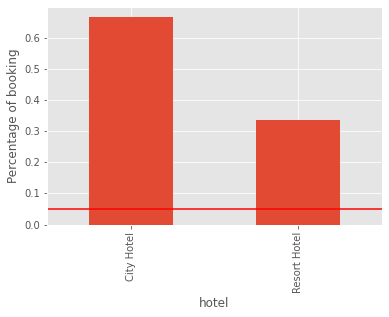

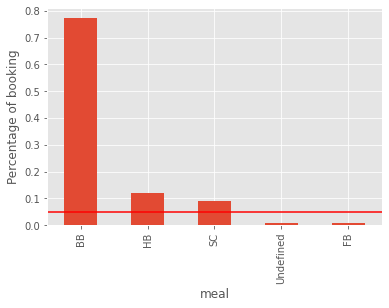

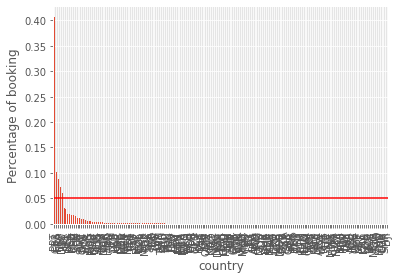

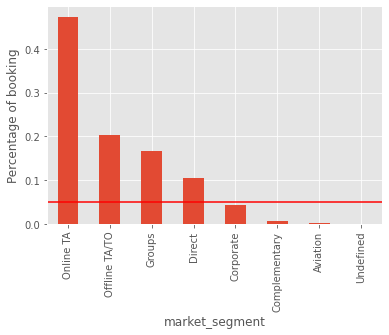

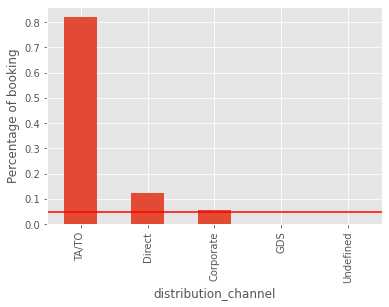

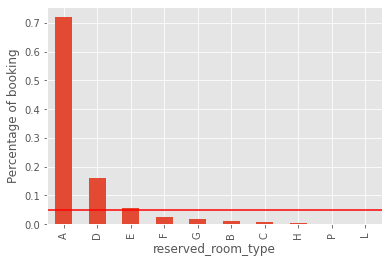

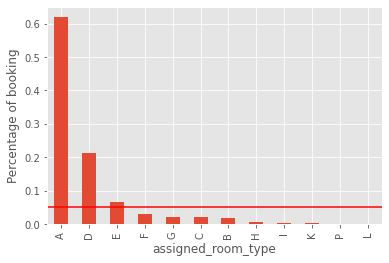

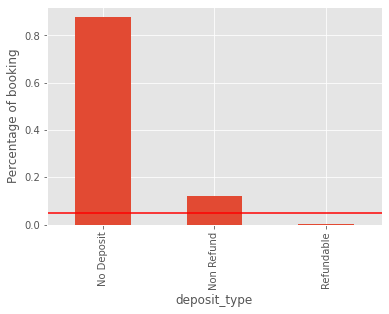

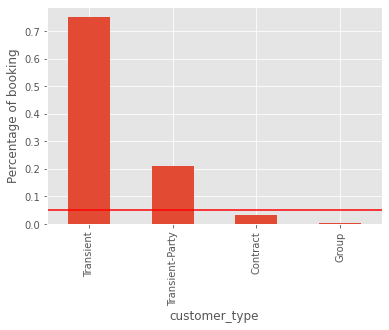

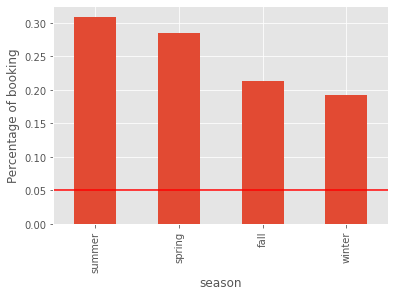

In [87]:
total_booking = len(df_train)

for col in categorical_train:
    temp_df = pd.Series(df_train[col].value_counts() / total_booking)

    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of booking')
    plt.show()

#### **Linear model assumption**

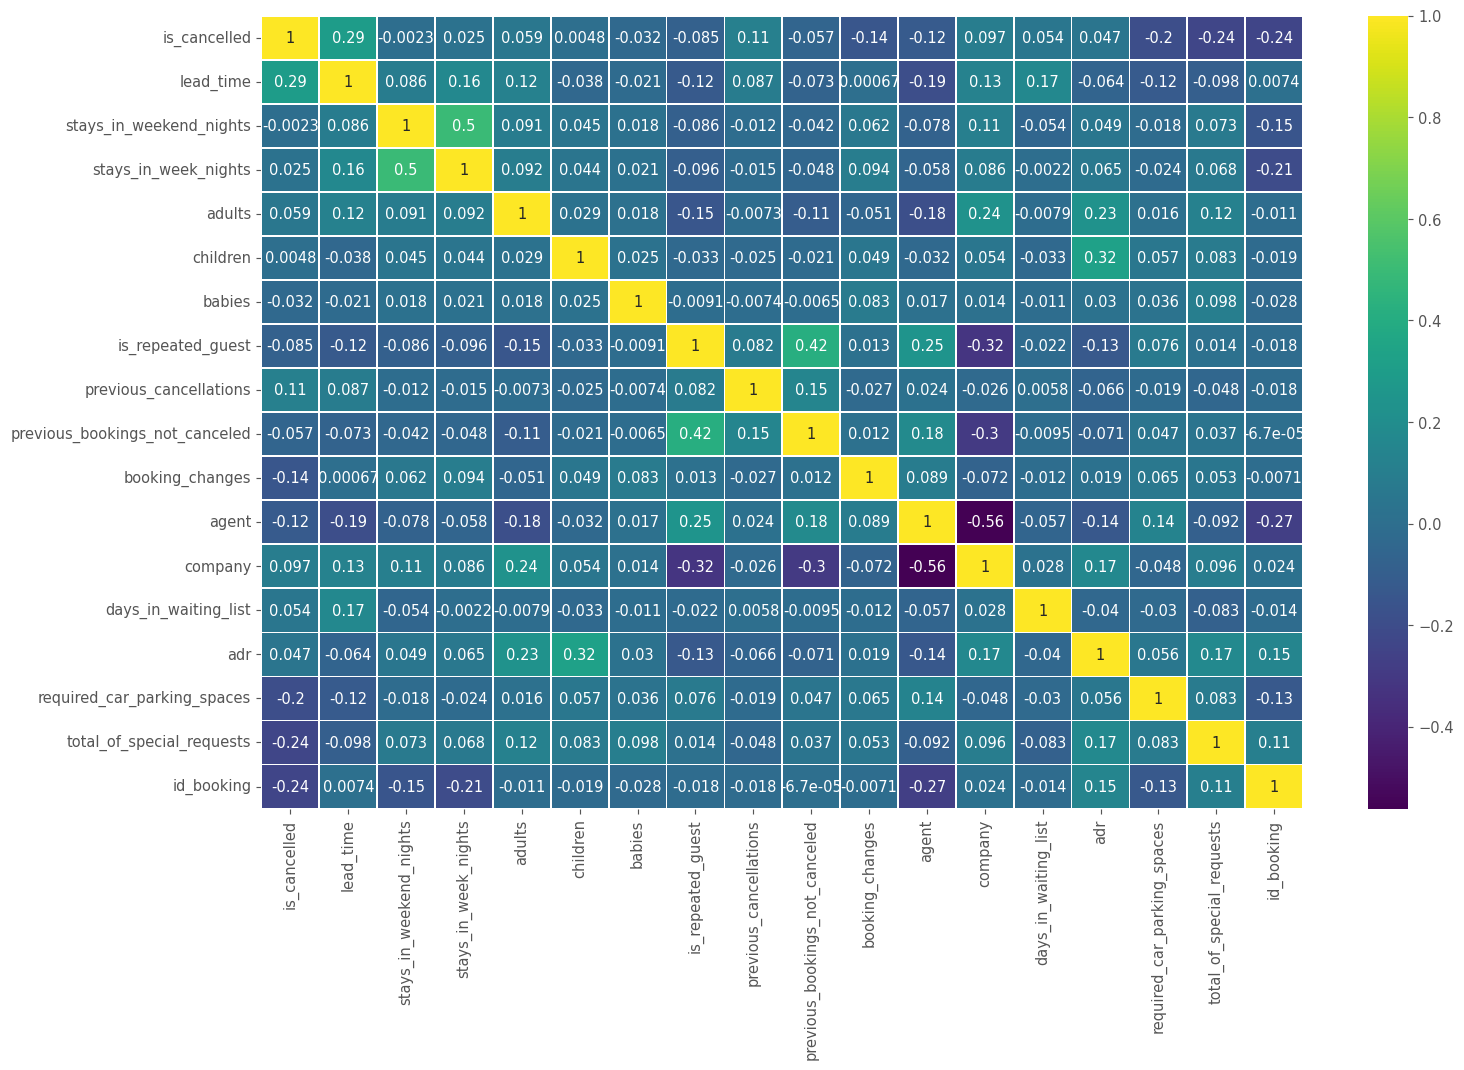

In [96]:
plt.figure(figsize=(16, 10), dpi=105)
sns.heatmap(df_train[numerical_train].corr(), 
            cmap='viridis',
            linewidth=0.5,annot=True
          )
plt.show()